In [1]:
import json
import numpy 
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  
import pyarrow
import sys
from tqdm import tqdm
import seaborn as sns
from datetime import date
from dotenv import load_dotenv
from sqlalchemy import create_engine
from os import path
from typing import List,Dict, Tuple
from collections import defaultdict
pd.set_option("display.max_columns", None)

load_dotenv(verbose=True)
BIGQUERY_CREDENTIALS_PATH = os.environ.get('BIGQUERY_CREDENTIALS_PATH')
engine = create_engine('bigquery://bespoke-financial/ProdMetrcData', credentials_path=os.path.expanduser(BIGQUERY_CREDENTIALS_PATH))

sys.path.append(path.realpath(path.join(os.getcwd(), "../core")))
sys.path.append(path.realpath(path.join(os.getcwd(), "../../src")))
sys.path.append(path.realpath(path.join(os.getcwd(), "../../scripts")))

import create_queries
import prepare_data

from bespoke.inventory.analysis.shared import download_util, inventory_types
from bespoke.inventory.analysis import active_inventory_util as util
from bespoke.inventory.analysis import inventory_valuations_util as valuations_util
from underwriting import msrp_band_analyzer

%load_ext autoreload
%autoreload 2

In [2]:
COMPANY_IDENTIFIER_LIST = [
    'RA',
    'HPCC',
    'SFVPC',
    'EMA',
    'EMF',
    'EMM',
    'EMT',
    'GRG',
    'ST',
    'EL'
]

In [3]:
mba = msrp_band_analyzer.MSRPBand()

In [4]:
mba.update_company_data(COMPANY_IDENTIFIER_LIST)


c:\users\roy luo\appdata\local\programs\python\python38\lib\site-packages\google\cloud\bigquery\client.py:535: UserWarning: Cannot create BigQuery Storage client, the dependency google-cloud-bigquery-storage is not installed.
  warnings.warn(


Verifying download summaries for license C9-0000323-LIC...
Earliest download summary: 2020-01-01
Latest download summary: 2022-03-08

Verifying download summaries for license C9-0000370-LIC...
Earliest download summary: 2020-01-01
Latest download summary: 2022-03-08

Verifying download summaries for license C10-0000774-LIC...
Earliest download summary: 2021-10-12
Latest download summary: 2022-03-08

Verifying download summaries for license C10-0000786-LIC...
Earliest download summary: 2021-10-12
Latest download summary: 2022-03-08

Verifying download summaries for license C10-0000939-LIC...
Earliest download summary: 2021-10-01
Latest download summary: 2022-03-08

Verifying download summaries for license C12-0000359-LIC...
Earliest download summary: 2022-01-03
Latest download summary: 2022-03-08

Verifying download summaries for license C10-0000005-LIC...
Earliest download summary: 2020-01-01
Latest download summary: 2022-03-07

Verifying download summaries for license C10-0000064-LIC.

C:\Users\Roy Luo\platform\services\api-server\scripts\underwriting\msrp_band_analyzer.py:276: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[measure_ratio_column_name][includes_measurement] = self.unit_conversion_ratio(measurement, measurement_unit)
C:\Users\Roy Luo\platform\services\api-server\scripts\underwriting\msrp_band_analyzer.py:276: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[measure_ratio_column_name][includes_measurement] = self.unit_conversion_ratio(measurement, measurement_unit)


### Available combined product category name in costs dataframe ### 	
['edible' 'vape cartridge' 'extract' 'other concentrate' 'flower'
 'capsule' 'pre-roll flower' 'pre-roll infused' 'pre-roll leaf' 'tincture'
 'topical' 'leaf' 'clone - cutting' 'shake' 'kief' 'seeds'
 'immature plant' 'infused butter/oil']
### Available combined product category name in sales dataframe ### 	
['vape cartridge' 'flower' 'edible' 'pre-roll flower' 'pre-roll leaf'
 'extract' 'other concentrate' 'pre-roll infused' 'tincture' 'capsule'
 'topical' 'seeds' 'clone - cutting' 'kief' 'shake' 'immature plant'
 'infused butter/oil']


In [5]:
top10_product_category_list = [
    'Other Concentrate (weight - each)',
    'Flower (packaged half ounce - each)',
    'Pre-Roll Infused',
    'Pre-Roll Flower',
    'Extract (weight - each)',
    'Flower',
    'Edible (weight - each)',
    'Vape Cartridge (weight - each)',
    'Vape Cartridge (volume - each)',
    'Flower (packaged eighth - each)'
]

# SALES Analysis

### RUN ANALYSIS FOR PRODUCT CATEGORY Flower (packaged eighth - each) ###
Number of transactions outliers below Boxplot Whisker Minimum is 0.10800750775314479 %
Number of transactions outliers above Boxplot Whisker Maximum is 5.246279985716271 %
Total number of transactions for Flower (packaged eighth - each) in tx_product_category_name : 538041


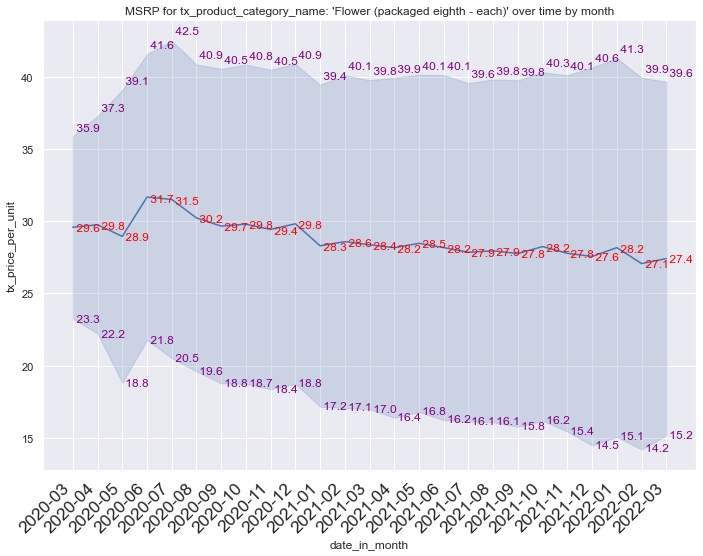

### RUN ANALYSIS FOR PRODUCT CATEGORY Vape Cartridge (volume - each) ###
Number of transactions outliers below Boxplot Whisker Minimum is 1.5745059252672267 %
Number of transactions outliers above Boxplot Whisker Maximum is 2.421646734297588 %
Total number of transactions for Vape Cartridge (volume - each) in tx_product_category_name : 264505


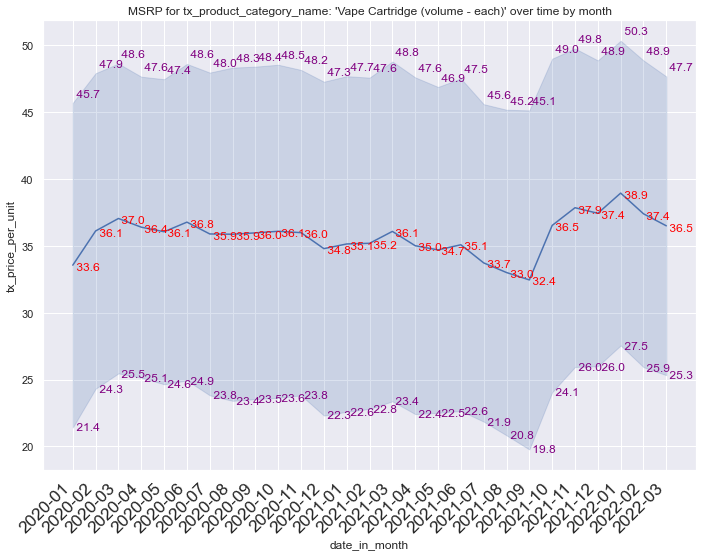

### RUN ANALYSIS FOR PRODUCT CATEGORY Vape Cartridge (weight - each) ###
Number of transactions outliers below Boxplot Whisker Minimum is 0.19583414295892437 %
Number of transactions outliers above Boxplot Whisker Maximum is 3.32117942446098 %
Total number of transactions for Vape Cartridge (weight - each) in tx_product_category_name : 253236


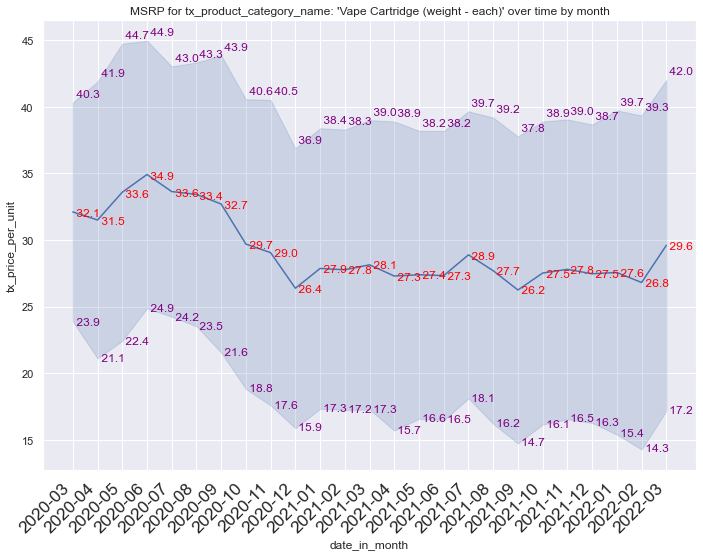

### RUN ANALYSIS FOR PRODUCT CATEGORY Edible (weight - each) ###
Number of transactions outliers below Boxplot Whisker Minimum is 0.24592988792544904 %
Number of transactions outliers above Boxplot Whisker Maximum is 1.3018844515515362 %
Total number of transactions for Edible (weight - each) in tx_product_category_name : 357091


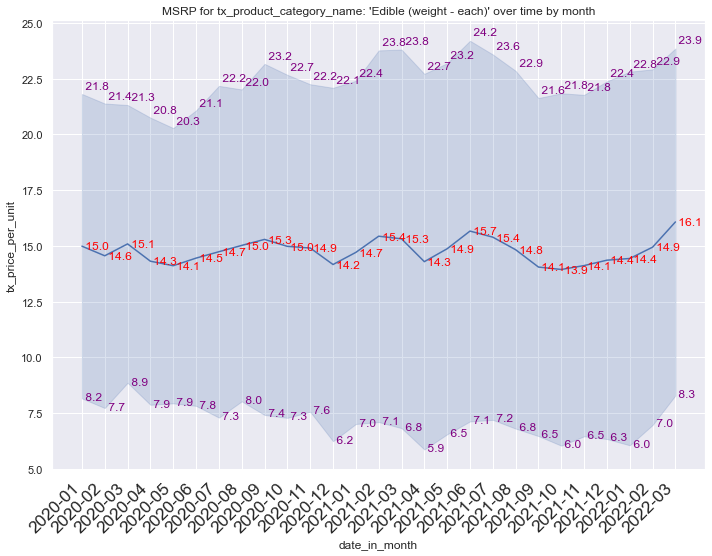

### RUN ANALYSIS FOR PRODUCT CATEGORY Flower ###
Number of transactions outliers below Boxplot Whisker Minimum is 0.6412179178810946 %
Number of transactions outliers above Boxplot Whisker Maximum is 6.5225388381108695 %
Total number of transactions for Flower in tx_product_category_name : 164037


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


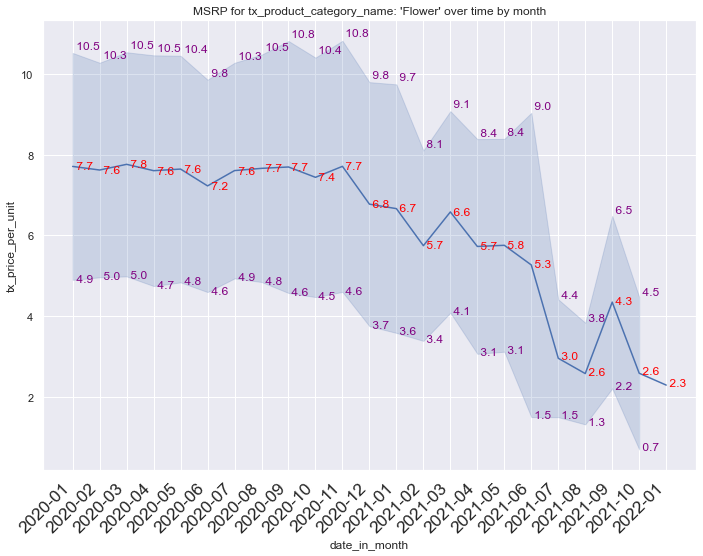

### RUN ANALYSIS FOR PRODUCT CATEGORY Extract (weight - each) ###
Number of transactions outliers below Boxplot Whisker Minimum is 6.146600221220519 %
Number of transactions outliers above Boxplot Whisker Maximum is 7.397804445818814 %
Total number of transactions for Extract (weight - each) in tx_product_category_name : 145382


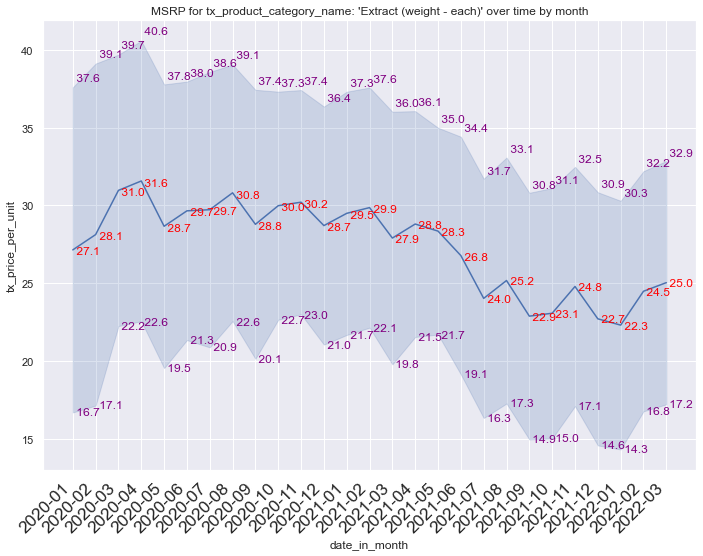

### RUN ANALYSIS FOR PRODUCT CATEGORY Pre-Roll Flower ###
Number of transactions outliers below Boxplot Whisker Minimum is 0.032698348549699656 %
Number of transactions outliers above Boxplot Whisker Maximum is 11.760750959825119 %
Total number of transactions for Pre-Roll Flower in tx_product_category_name : 240085


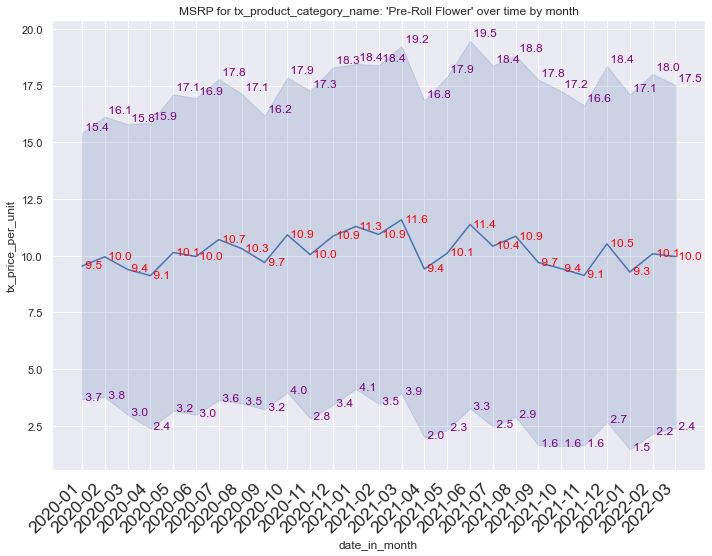

### RUN ANALYSIS FOR PRODUCT CATEGORY Pre-Roll Infused ###
Number of transactions outliers below Boxplot Whisker Minimum is 0.12507158702678509 %
Number of transactions outliers above Boxplot Whisker Maximum is 7.598428047632526 %
Total number of transactions for Pre-Roll Infused in tx_product_category_name : 140180


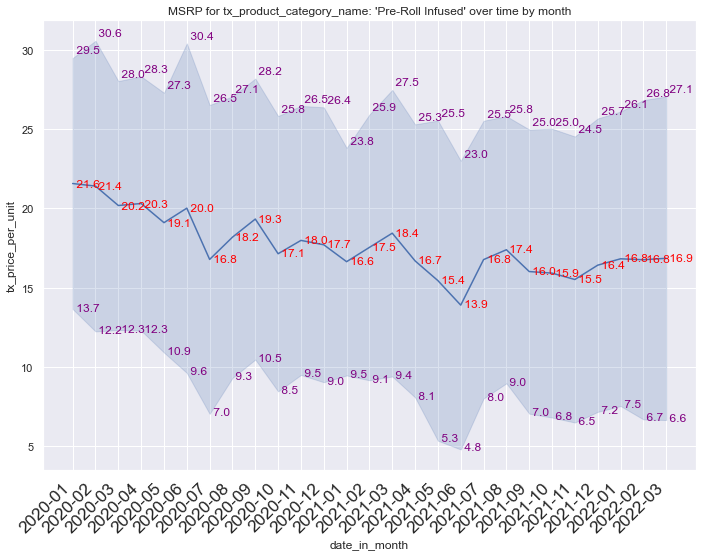

### RUN ANALYSIS FOR PRODUCT CATEGORY Flower (packaged half ounce - each) ###
Number of transactions outliers below Boxplot Whisker Minimum is 0.044279135671271695 %
Number of transactions outliers above Boxplot Whisker Maximum is 7.657338528751918 %
Total number of transactions for Flower (packaged half ounce - each) in tx_product_category_name : 31267


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


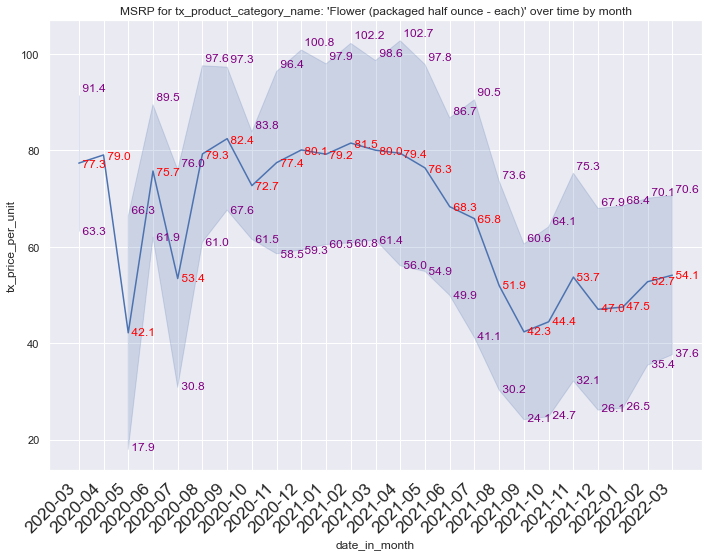

### RUN ANALYSIS FOR PRODUCT CATEGORY Other Concentrate (weight - each) ###
Number of transactions outliers below Boxplot Whisker Minimum is 5.6969816337584325 %
Number of transactions outliers above Boxplot Whisker Maximum is 6.442135670556567 %
Total number of transactions for Other Concentrate (weight - each) in tx_product_category_name : 53531


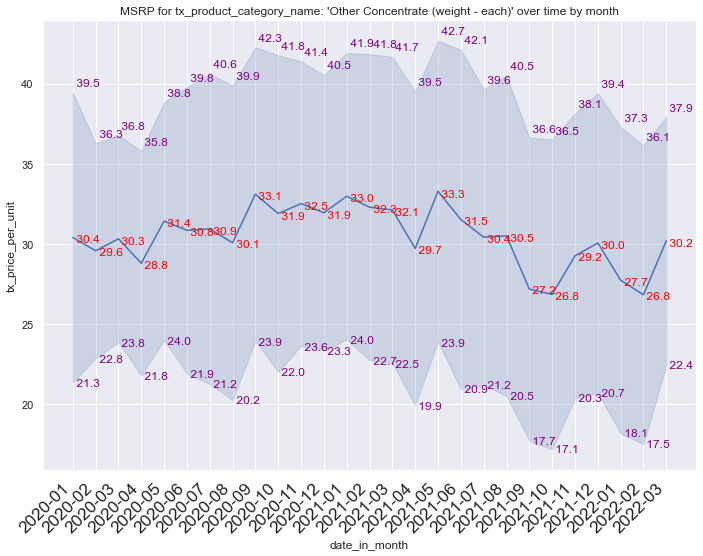

In [6]:
mba.run_time_series_plot_analysis_multi_category('tx_product_category_name', top10_product_category_list[::-1], 'S')

# COSTS Analysis

### RUN ANALYSIS FOR PRODUCT CATEGORY Flower (packaged eighth - each) ###
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.5355064027939465 %
Total number of transactions for Flower (packaged eighth - each) in product_category_name : 17088


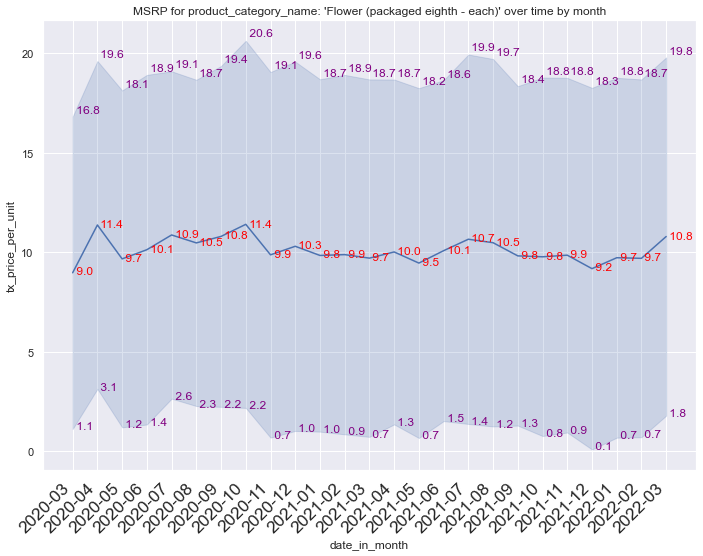

### RUN ANALYSIS FOR PRODUCT CATEGORY Vape Cartridge (volume - each) ###
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 1.6963098930312046 %
Total number of transactions for Vape Cartridge (volume - each) in product_category_name : 15531


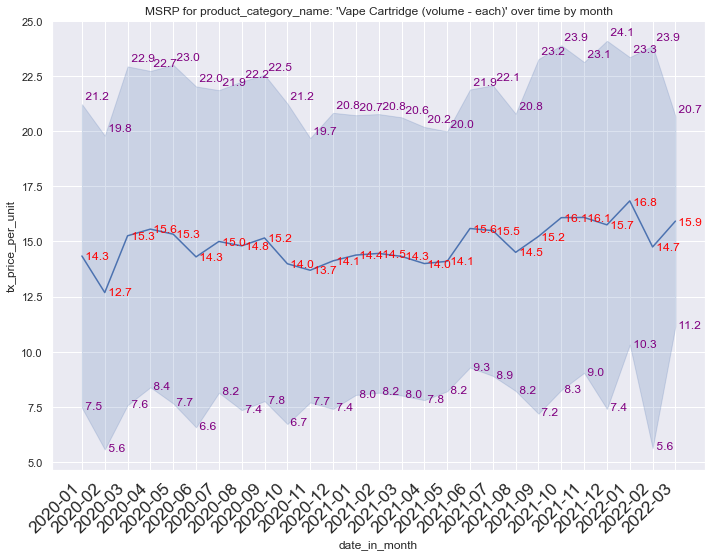

### RUN ANALYSIS FOR PRODUCT CATEGORY Vape Cartridge (weight - each) ###
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 1.8834459459459458 %
Total number of transactions for Vape Cartridge (weight - each) in product_category_name : 11617


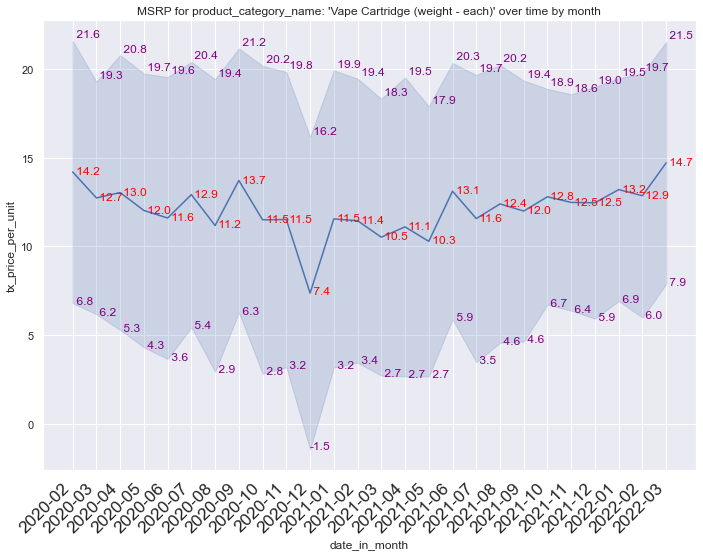

### RUN ANALYSIS FOR PRODUCT CATEGORY Edible (weight - each) ###
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 0.8784680528344814 %
Total number of transactions for Edible (weight - each) in product_category_name : 15684


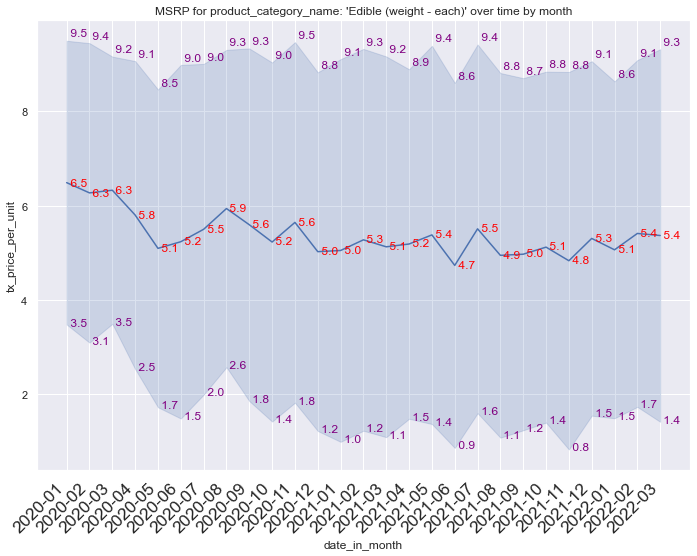

### RUN ANALYSIS FOR PRODUCT CATEGORY Flower ###
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 5.862433862433862 %
Total number of transactions for Flower in product_category_name : 4448


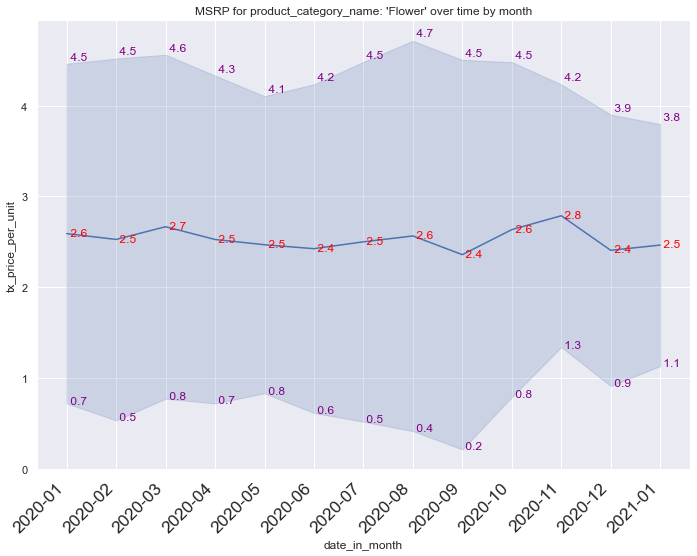

### RUN ANALYSIS FOR PRODUCT CATEGORY Extract (weight - each) ###
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 3.906626796566027 %
Total number of transactions for Extract (weight - each) in product_category_name : 9962


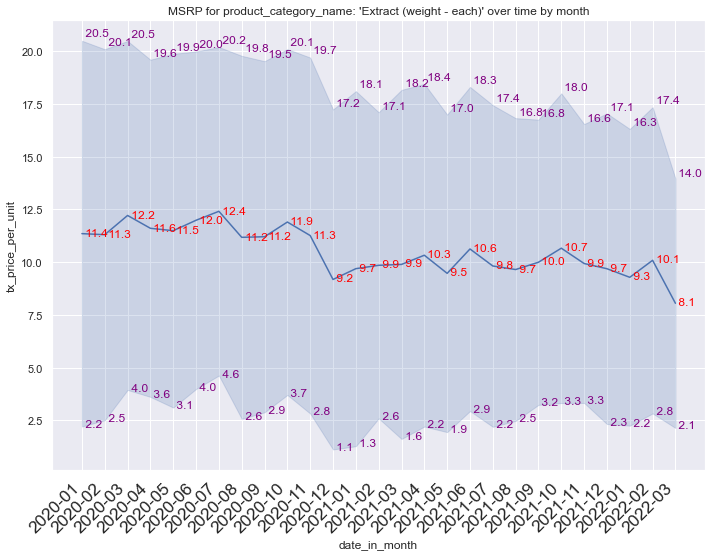

### RUN ANALYSIS FOR PRODUCT CATEGORY Pre-Roll Flower ###
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 10.36030850696443 %
Total number of transactions for Pre-Roll Flower in product_category_name : 7787


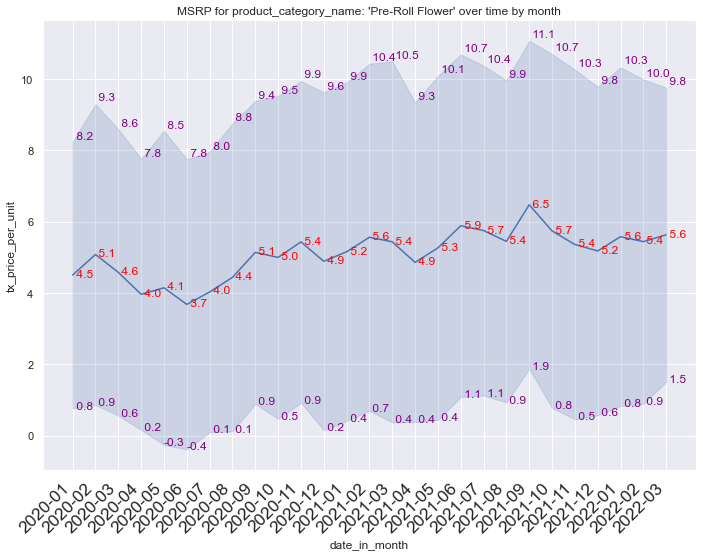

### RUN ANALYSIS FOR PRODUCT CATEGORY Pre-Roll Infused ###
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 1.1449077238550922 %
Total number of transactions for Pre-Roll Infused in product_category_name : 5785


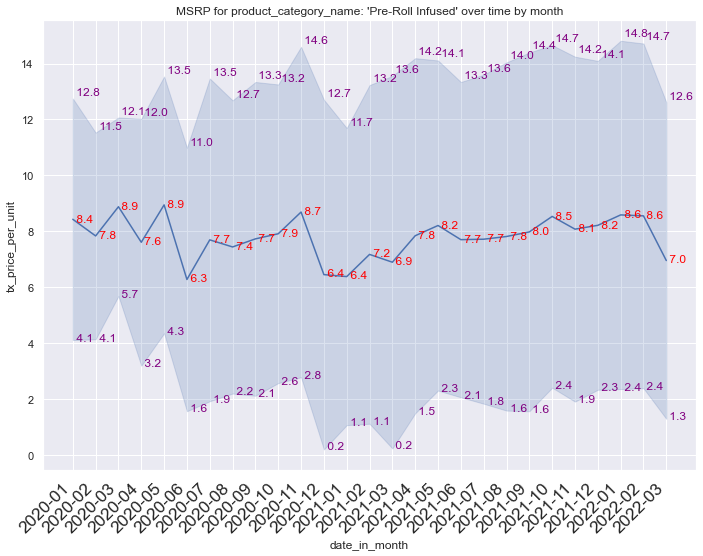

### RUN ANALYSIS FOR PRODUCT CATEGORY Flower (packaged half ounce - each) ###
Number of transactions outliers below Boxplot Whisker Minimum is 14.695077149155033 %
Number of transactions outliers above Boxplot Whisker Maximum is 8.67009551800147 %
Total number of transactions for Flower (packaged half ounce - each) in product_category_name : 1043


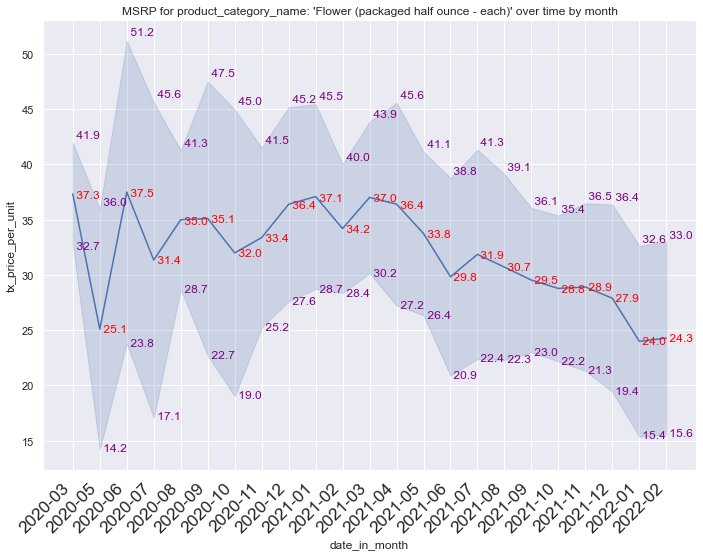

### RUN ANALYSIS FOR PRODUCT CATEGORY Other Concentrate (weight - each) ###
Number of transactions outliers below Boxplot Whisker Minimum is 0.0 %
Number of transactions outliers above Boxplot Whisker Maximum is 1.4972067039106145 %
Total number of transactions for Other Concentrate (weight - each) in product_category_name : 4408


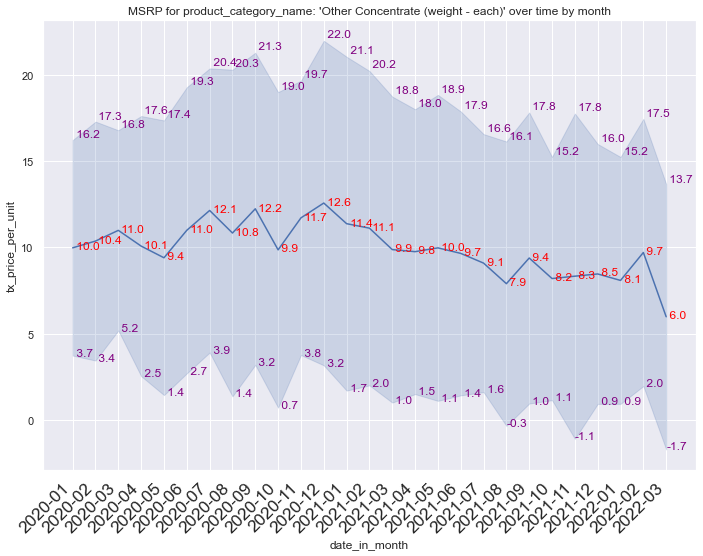

In [7]:
mba.run_time_series_plot_analysis_multi_category('product_category_name', top10_product_category_list[::-1], 'C')